In [1]:
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np
                                                   


In [11]:
df = pd.DataFrame(data = np.random.randn(100,5),columns=[f"Trial{i}" for i in range(1,6)])
                                                    

In [12]:
df

,Trial1,Trial2,Trial3,Trial4,Trial5
0,0.803040,-1.175933,1.288630,0.951063,0.611002
1,-0.903141,-0.294016,1.401961,0.910467,1.973276
2,0.190329,-1.149231,0.052299,-1.700654,-0.783125
3,0.475624,-0.679347,-1.053647,0.900304,0.504009
4,0.053388,-0.398353,0.933184,0.181874,0.978207
...,...,...,...,...,...
95,0.928179,-0.377739,-0.109141,1.099545,-1.253862
96,-0.347081,0.072207,-1.003925,-0.850295,-0.723354
97,-0.185466,-0.737971,-1.130734,-0.603452,0.031260
98,0.495370,-0.902852,0.622546,0.509953,0.050275


In [14]:
xw.view(df)

In [16]:
xw.view(df,mysheet)

NameError: name 'mysheet' is not defined

In [17]:
xw.load(df)

TypeError: 'NoneType' object is not subscriptable

In [18]:
xw.Book()

<Book [工作簿2]>

In [19]:
xw.Book('工作簿2')

<Book [工作簿2]>

In [20]:
xw.Book('工作簿2.xlsx')

FileNotFoundError: No such file: '工作簿2.xlsx'

In [21]:
xw.Book(r'D:\a00nutstore\fishc\材料入库单.xlsx')

<Book [材料入库单.xlsx]>

In [23]:
xw.books.active

<Book [材料入库单.xlsx]>

In [40]:
book = xw.Book()
book.name

'工作簿4'

In [41]:
book.sheets

Sheets([<Sheet [工作簿4]Sheet1>])

In [42]:
sheet1 = book.sheets[0]


In [32]:
sheet1 = book.sheets['Sheet1']

In [43]:
sheet1.range('A1')

<Range [工作簿4]Sheet1!$A$1>

In [44]:
sheet1.range('A1').value = [[1,2],
                           [3,4]]

In [45]:
sheet1.range('A4').value = 'Hello'

In [46]:
sheet1.range('A1:B2').value

[[1.0, 2.0], [3.0, 4.0]]

In [47]:
sheet1.range('A4').value

'Hello'

In [48]:
sheet1.range('A1:B2')[0,0]

<Range [工作簿4]Sheet1!$A$1>

In [49]:
sheet1.range('A1:B2')[:,1]

<Range [工作簿4]Sheet1!$B$1:$B$2>

In [50]:
sheet1['A1']

<Range [工作簿4]Sheet1!$A$1>

In [51]:
sheet1['A1:B2']

<Range [工作簿4]Sheet1!$A$1:$B$2>

In [52]:
sheet1[0,0]

<Range [工作簿4]Sheet1!$A$1>

In [53]:
sheet1[:2,:2]

<Range [工作簿4]Sheet1!$A$1:$B$2>

In [54]:
sheet1[9,3]

<Range [工作簿4]Sheet1!$D$10>

In [55]:
sheet1.range((10,4))

<Range [工作簿4]Sheet1!$D$10>

In [56]:
sheet1[9:11,3:6]

<Range [工作簿4]Sheet1!$D$10:$F$11>

In [57]:
sheet1['A1'].sheet.book.app                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

<Excel App 25896>

In [58]:
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [59]:
[book.name for book in visible_app.books]

['工作簿1', '材料入库单.xlsx', '工作簿4']

In [60]:
[book.name for book in invisible_app.books]

['工作簿2']

In [61]:
xw.apps.keys()

[31168, 25896]

In [62]:
xw.apps.active.pid

31168

In [66]:
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]['A1'].value = 'Created by an invisible app'

error: (1400, 'FindWindowEx', '无效的窗口句柄。')

In [65]:
invisible_book.save('invisible.xlsx')
invisible_app.quit()

In [69]:
data = [['Mark',55,'Italy',4.5,'Europe'],
       ['John',33,'USA',6.7,'America']]
df = pd.DataFrame(data=data,
                 columns=['name','age','country','score','continent'],
                          index =[1001,1000])
df.index_name ='use_id'
                          
df

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [70]:
sheet1['A6'].value = df

In [71]:
sheet1['B10'].options(header=False,index=False).value = df

In [72]:
df2 = sheet1['A6'].expand().options(pd.DataFrame).value

In [73]:
df2

,name,age,country,score,continent
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


In [74]:
df2.index = df2.index.astype(int)

In [75]:
df2

,name,age,country,score,continent
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


In [76]:
sheet1['A1:B1'].value

[1.0, 2.0]

In [77]:
sheet1['A1:A2'].value

[1.0, 3.0]

In [78]:
sheet1['A1:B1'].options(ndim=2).value

[[1.0, 2.0]]

In [79]:
sheet1['A1:A2'].options(ndim=2).value

[[1.0], [3.0]]

In [80]:
sheet1['A1:A2'].options(np.array).value

array([1., 3.])

In [81]:
sheet1['A1:A2'].options(np.array,ndim=2).value

array([[1.],
       [3.]])

In [82]:
sheet1['D1'].options(transpose=True).value=[100,200]

In [84]:
sheet1['D1:D2'].value

[100.0, 200.0]

In [85]:
sheet1['A13'].value =[dt.datetime(2020,1,1),None,1.0]

In [86]:
sheet1['A13:C13'].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [87]:
sheet1['A13:C13'].options(empty='NA',dates=dt.date,numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

In [89]:
sheet1['A15'].value=[[None,'North','Sorth'],
                    ['Last Year',2,5],
                    ['This Year',3,6]]

In [91]:
chart = sheet1.charts.add(top = sheet1['A19'].top,
                         left = sheet1['A19'].left)
chart.chart_type = 'column_clustered'
chart.set_source_data(sheet1['A15'].expand())

In [93]:
df = sheet1['A15'].expand().options(pd.DataFrame).value
df

,North,Sorth
Last Year,2.0,5.0
This Year,3.0,6.0


In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')


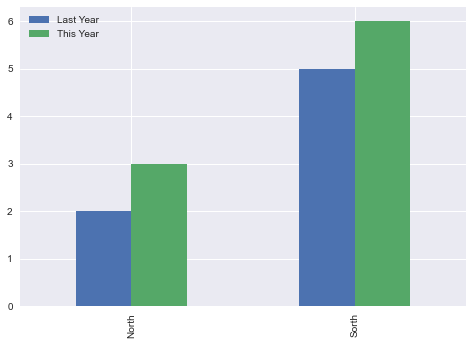

In [95]:
ax = df.T.plot.bar()
fig = ax.get_figure()

In [97]:
plot = sheet1.pictures.add(fig,name='SalesPlot',
                         top = sheet1['H19'].top,
                         left = sheet1['H19'].left)
plot.width,plot.height = plot.width*0.7,plot.height*0.7

In [98]:
ax = (df+1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [99]:
sheet1['A1:B2'].name = 'matrix1'

In [100]:
sheet1['B10:E11'].name = 'sheet1!matrix2'

In [101]:
sheet1.names

[<Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [102]:
book.names

[<Name 'matrix1': =Sheet1!$A$1:$B$2>, <Name 'Sheet1!matrix2': =Sheet1!$B$10:$E$11>]

In [103]:
book.names['matrix1'].refers_to_range

<Range [工作簿4]Sheet1!$A$1:$B$2>

In [104]:
book.names.add('EURUSD','=1.1151')

<Name 'EURUSD': =1.1151>

In [105]:
template = xw.Book(r'D:\a00nutstore\python-for-excel-1st-edition\xl\sales_report_template.xlsx')
sheet = template.sheets['Sheet1']
sheet['B3'].value = summary
sheet['B3'].expand().columns.autofit()
sheet.charts['Chart 1'].set_source_data(sheet['B3'].expand()[:-1,:-1])
template.save('sales_report_xlwings1.xlsx')

NameError: name 'summary' is not defined

In [106]:
app.quit()

NameError: name 'app' is not defined